LAB 1: EXPLORING TABLE DATA

-TEAM:

- EMMANUEL NWORIE, 48666363
- PHILEMON AKUBUEZE, 49261257
- KENULE NWIGBO, 49258046

TELCO CUSTOMER CHURN
url - https://www.kaggle.com/datasets/blastchar/telco-customer-churn
(Focused customer retention programs)

## BUSINESS UNDERSTANDING
## 1. Overview of the Dataset
We got our dataset from Kaggle (https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

Customer churn is the loss of clients or customers(https://en.wikipedia.org/wiki/Customer_attrition).

The Telco Customer Churn dataset tells a customer-level snapshot of a telecommunications service provider.
Each row represents an individual customer, with various features capturing demographic characteristics, subscribed services, billing information, and contractual attributes.
IBM developed this dataset as a support for research and applied analytics on customer churn, which is a major challenge in subscription-based industries.


## 2. Purpose of the Dataset (Why and How It Was Collected)
Customer churn represents a significant challenge in the telecommunications industry due to intense market competition and relatively low switching costs, which enable customers to change providers with minimal constraints. Because retaining existing customers is generally more cost effective than acquiring new ones, reducing churn is a strategic priority for telecom firms.

Organizations therefore rely on historical customer data, captured through routine operational processes to identify behavioral, contractual, and service related patterns associated with customer attrition. The primary purpose of this dataset is to support exploratory analysis and predictive modeling aimed at understanding the determinants of churn.

## 3. Prediction Task
The objective is to predict whether a customer will churn (Yes) or remain with the company (No) in a future period, based on their demographic attributes, subscribed services, and billing and contractual information. This dataset is a binary classification problem.

## 4. Third Parties and Their Interest
The prediction results are valuable to third parties for the following reasons:

1. To target high-risk customers with personalized retention offers.

2. To prioritize outreach efforts toward vulnerable accounts.

3. To evaluate how pricing structures, contract types, and service bundles influence customer retention.

3. To improve revenue forecasting and customer lifetime value (CLV) estimation.

By identifying customers who are most likely to churn, the organization can allocate resources more effectively and implement proactive intervention strategies.

## 5. Required Model Performance for Practical Usefulness
For these third parties, our  churn prediction model would be considered operationally valuable if it indicates strong separation between churners and non-churners; and identifies a top high-risk customer segment in which the churn rate is higher than the overall population average.

Achieving this level of performance would make the model economically justifiable, enabling the company to focus retention efforts on customers with significantly elevated churn risk and thereby improve long-term revenue sustainability.

## DATA UNDERSTANDING
- Here we load our dataset

In [402]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import kagglehub
import os

path = kagglehub.dataset_download("blastchar/telco-customer-churn")


file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
full_file_path = os.path.join(path, file_name)
df = pd.read_csv(full_file_path)

df.head()



Using Colab cache for faster access to the 'telco-customer-churn' dataset.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Here are the our data attributes.

In [403]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Here are the descriptions of the attributes of our dataset.

In [404]:
# The attribute overview table is given below
attribute_overview = pd.DataFrame({
    "Feature": df.columns,
    "Description": [
        "Unique customer identifier",
        "Customer gender (Male/Female)",
        "Whether the customer is a senior citizen",
        "Whether the customer has a partner",
        "Whether the customer has dependents",
        "Number of months the customer has stayed with the company",
        "Whether phone service is subscribed",
        "Whether multiple phone lines are subscribed",
        "Type of internet service subscribed",
        "Whether online security service is subscribed",
        "Whether online backup service is subscribed",
        "Whether device protection service is subscribed",
        "Whether technical support service is subscribed",
        "Whether streaming TV service is subscribed",
        "Whether streaming movies service is subscribed",
        "Type of customer contract",
        "Whether paperless billing is enabled",
        "Payment method used by the customer",
        "Monthly billing amount",
        "Total amount billed to the customer",
        "Customer churn status"
    ],
    "Data Type": [
        "Categorical (ID)",
        "Categorical",
        "Binary (0/1)",
        "Categorical",
        "Categorical",
        "Numerical (Integer)",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Numerical (Float)",
        "Numerical (Float)",
        "Categorical (Target)"
    ]
})

attribute_overview


,Feature,Description,Data Type
0,customerID,Unique customer identifier,Categorical (ID)
1,gender,Customer gender (Male/Female),Categorical
2,SeniorCitizen,Whether the customer is a senior citizen,Binary (0/1)
3,Partner,Whether the customer has a partner,Categorical
4,Dependents,Whether the customer has dependents,Categorical
5,tenure,Number of months the customer has stayed with ...,Numerical (Integer)
6,PhoneService,Whether phone service is subscribed,Categorical
7,MultipleLines,Whether multiple phone lines are subscribed,Categorical
8,InternetService,Type of internet service subscribed,Categorical
9,OnlineSecurity,Whether online security service is subscribed,Categorical


In [405]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Here are the data-types of the different attributes of our dataset.

In [406]:
print(df.dtypes)
print('===========')
print(df.info())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Depe

## Data Quality

Based on the DataFrame summary, the Telco Customer Churn dataset consists of 7,043 observations. Most features contain 7,043 non-null entries, indicating that the dataset is largely complete. However, closer examination reveals that the TotalCharges variable includes values recorded as blank spaces, which represent implicit missing values rather than valid numerical entries.

## MISSING DATA

In total, 11 observations contain missing values in the TotalCharges feature. This is because, from our data info, we discovered that the total charges data type is object rather than float. Hence, we searched further to confirm that they are indeed missing data but stored as string.
No duplicate records were identified in the dataset.

After careful consideration, we concluded that these missing values were deliberately stored as strings (with datatype object) for users to be able to detect it and convert to float datatype for further analysis. Given the small number of missing observations relative to the dataset size, it is most appropriate to use elimination method. But we further decided to impute the missing data using K-Nearest Neigbor(KNN).




First, checking for duplicate data

In [407]:
df.duplicated().sum()

np.int64(0)

There are no duplicated data in our dataset.

Searching for missing data

In [408]:
## SEARCHING OUT MISSING VALUES
#
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


From the dataset, we observed that 10 out of the 11 customers with missing values in the TotalCharges variable were on two-year contracts. After further examining customers with one-year and two-year contracts, we still noticed that they all have zero tenure, hence our reason for further choosing the elimination method.

In [409]:
# Setting missing values in the totalcharges as NAN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isna().sum()

# ensure Churn is numeric
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1}) if df['Churn'].dtype == 'object' else df['Churn']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [410]:
# Ensure TotalCharges is numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Find minimum and maximum
min_charge = df['TotalCharges'].min()
max_charge = df['TotalCharges'].max()

print("Minimum TotalCharges:", min_charge)
print("Maximum TotalCharges:", max_charge)


Minimum TotalCharges: 18.8
Maximum TotalCharges: 8684.8


We noticed that the datatype for the TotalCharges is object, therefore we forced them from non-numeric values (blank spaces) to NaN and further confirmed that these missing values are now numeric values with datatype float. Also, the Totalcharges ranges from 18.8 to 8684.8

## Cleaning the DataSet

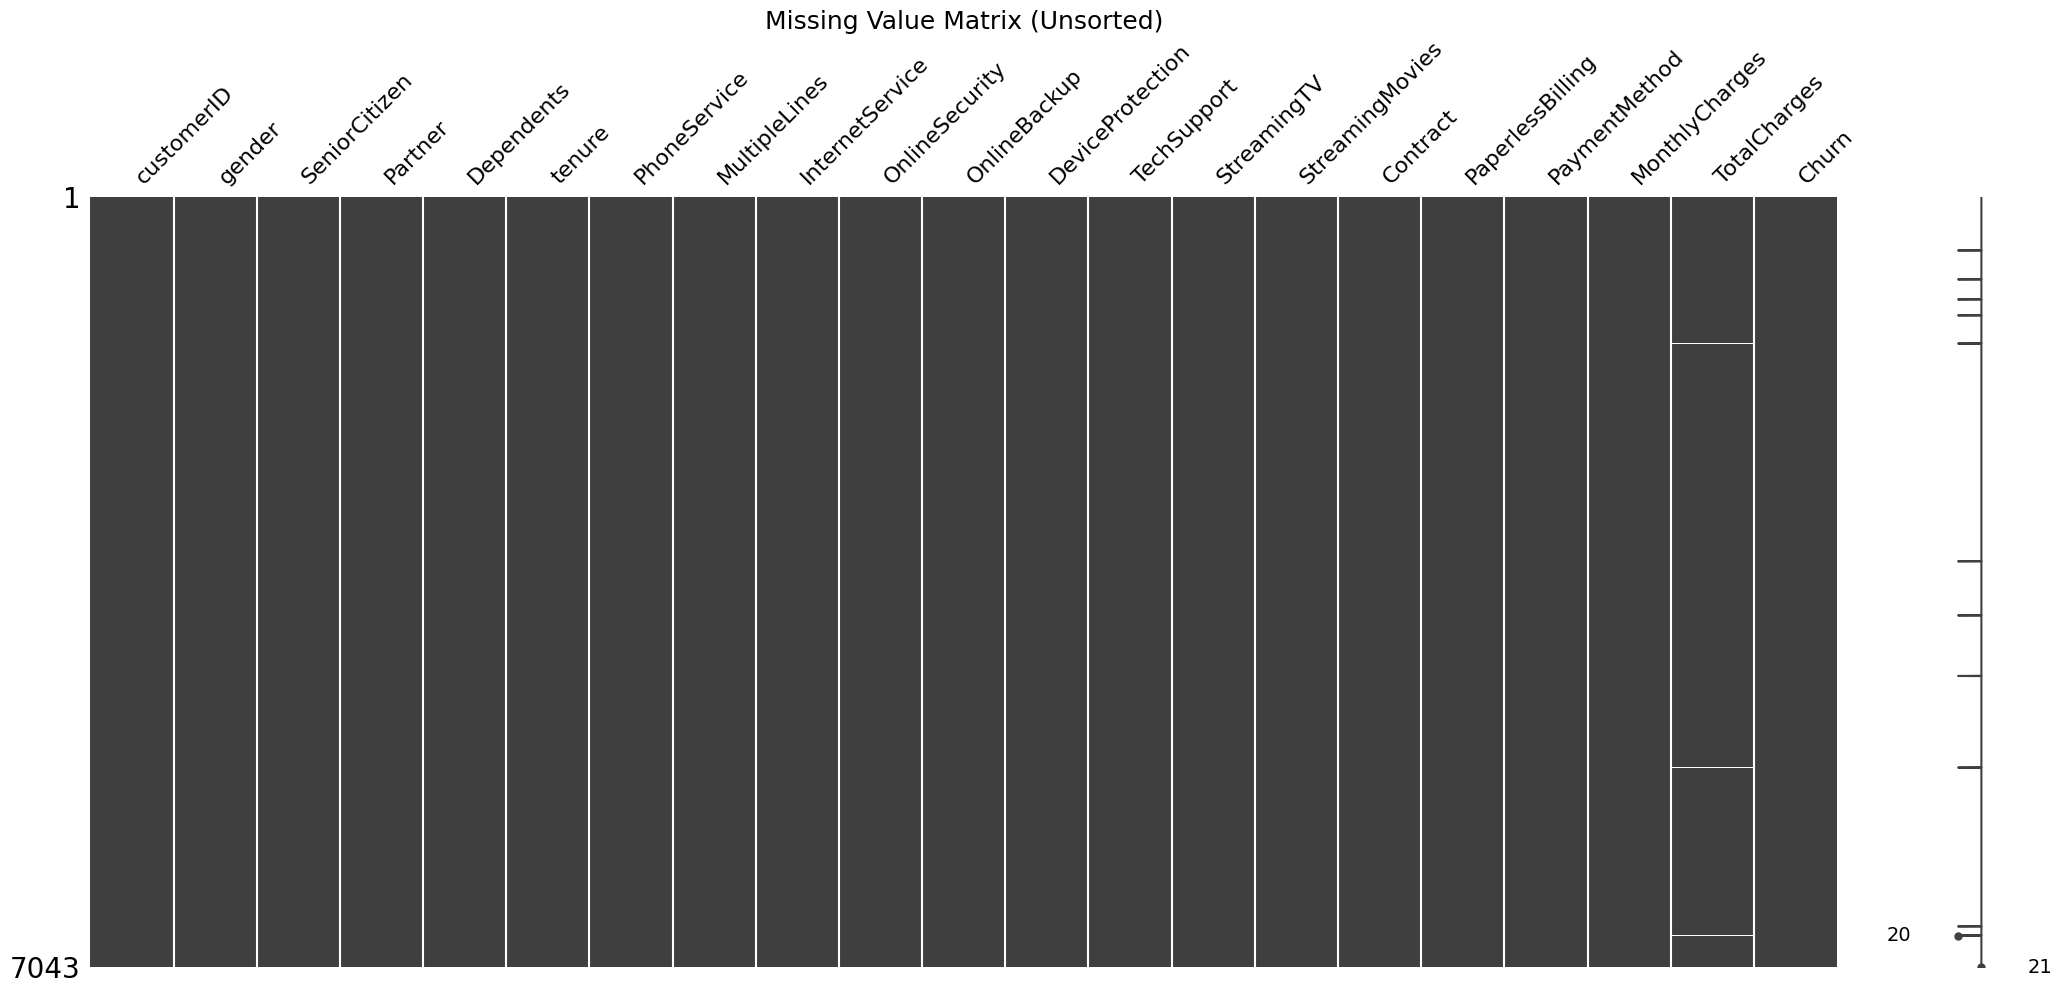

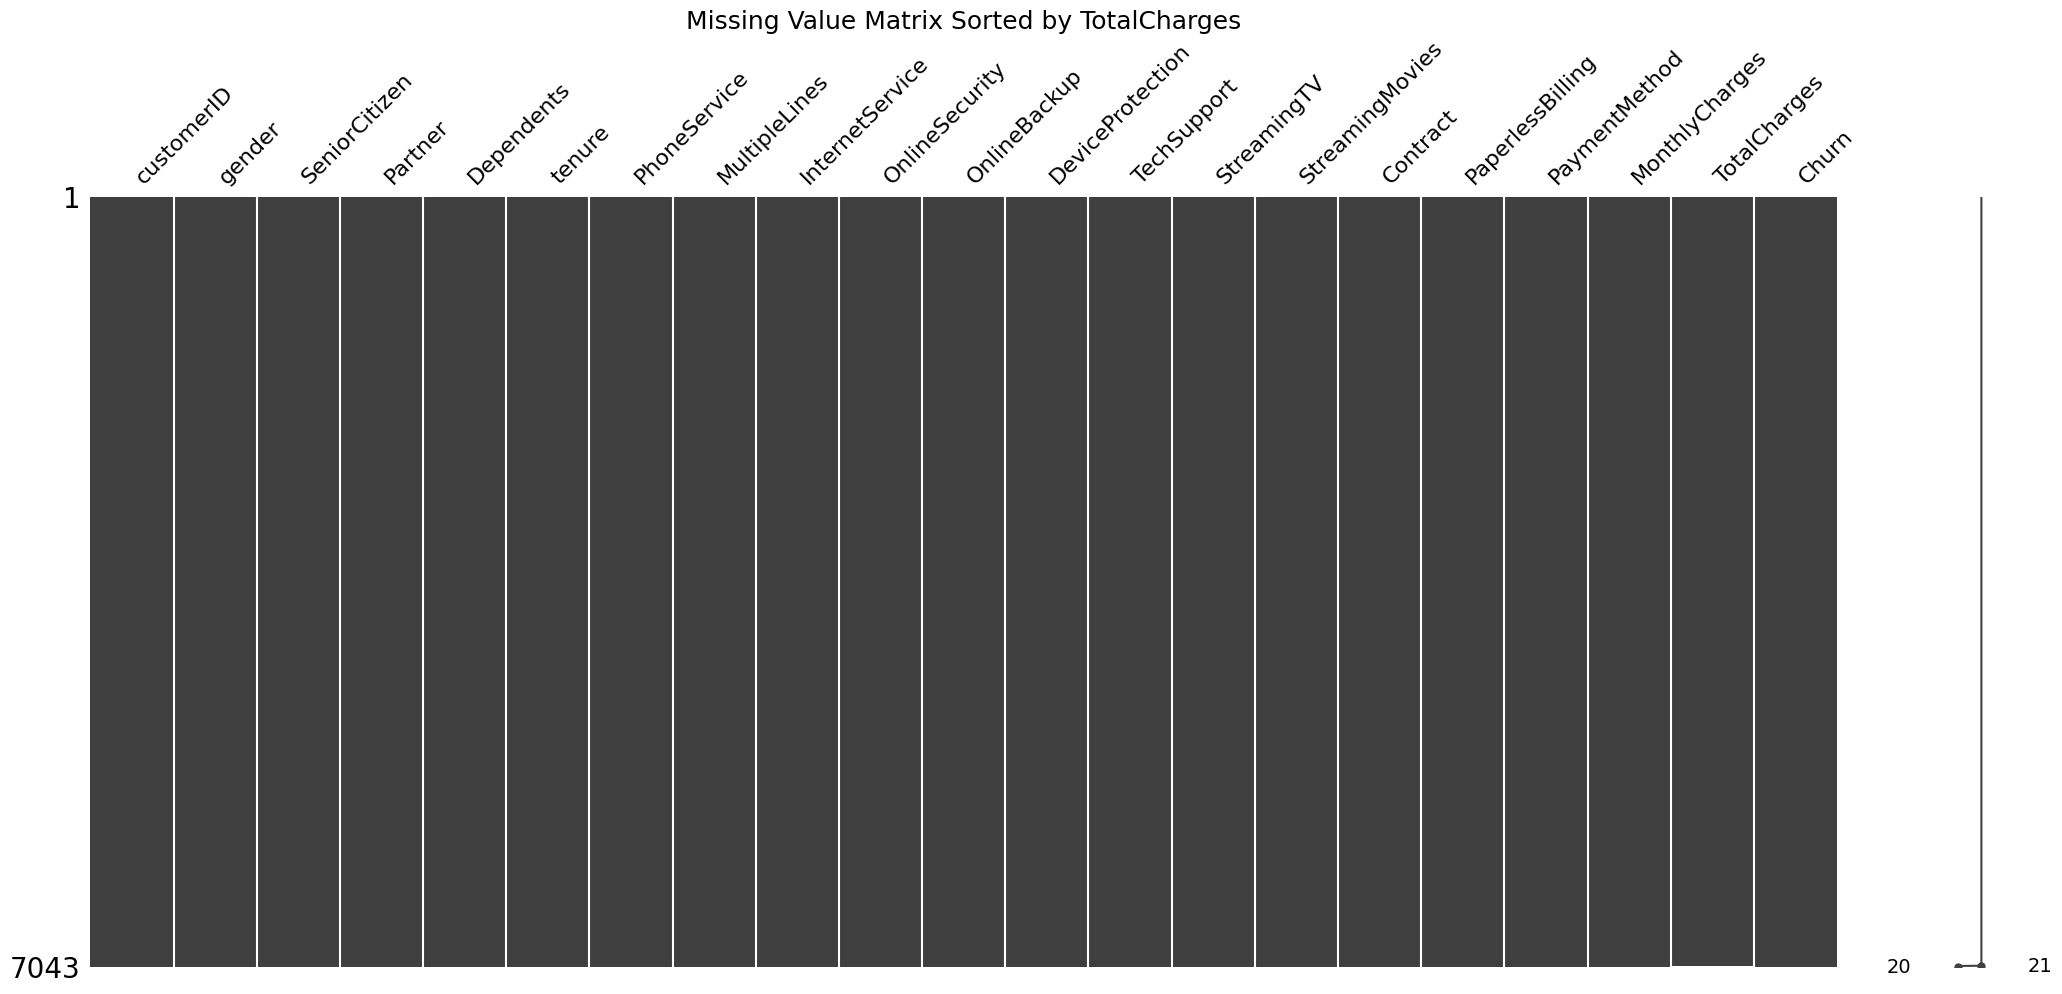

In [411]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
%matplotlib inline

# package for missing data visualization
import missingno as mn

# visualize missing values in the original dataset
mn.matrix(df)
plt.title("Missing Value Matrix (Unsorted)", fontsize=18)
plt.show()

# visualize missing values sorted by TotalCharges
mn.matrix(df.sort_values(by="TotalCharges"))
plt.title("Missing Value Matrix Sorted by TotalCharges", fontsize=18)
plt.show()

This visualization confirms that missing values are only isolated to TotalCharges.

In [412]:
# remove attributes that just are not useful for us.
for col in ['customerID','PaperlessBilling','PaymentMethod','Dependents','Partner']:
    if col in df:
        del df[col]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   tenure            7043 non-null   int64  
 3   PhoneService      7043 non-null   object 
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   int64  
dtypes: float64(2), int64(3), object(11)
memory

We removed these feature, 'customerID','PaperlessBilling','PaymentMethod','Dependents','Partner' because they do not have strong effect on customer churn in our data analysis.

## K-Nearest Neighbors(KNN) as an imputation technique

In [413]:

# impute based upon the K closest samples (rows)
from sklearn.impute import KNNImputer
import copy

# get object for imputation
num_neighbors = 5
knn_obj = KNNImputer(n_neighbors=num_neighbors)

features_to_use = ['Churn','TotalCharges','SeniorCitizen','tenure','MonthlyCharges']

# create a numpy matrix from pandas numeric values to impute
temp = df[features_to_use].to_numpy()

# use sklearn imputation object
knn_obj.fit(temp) # fit the object
temp_imputed = knn_obj.transform(temp) # transform all mssing data
#    could have also done:
# temp_imputed = knn_obj.fit_transform(temp)

# this is VERY IMPORTANT, make a deep copy, not just a reference to the object
# otherwise both data frames will be manipulated
df_imputed = copy.deepcopy(df) # not just an alias
df_imputed[features_to_use] = temp_imputed
df_imputed.dropna(inplace=True)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   float64
 2   tenure            7043 non-null   float64
 3   PhoneService      7043 non-null   object 
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   float64
dtypes: float64(5), object(11)
memory usage: 88

## Elimination Method

In [414]:
# This code is for Elimination
#     let's clean the dataset a little before moving on

# Impute some missing values, grouped by tenure,Contract,MonthlyCharges.
# then use this grouping to fill the data set in each group, then transform back
df_grouped = df.groupby(by=['tenure','Contract','MonthlyCharges']) # perform the grouping of thing related to Total charges

func = lambda grp: grp.fillna(grp.mean())  # imputation function

numeric_columns = ['Churn','TotalCharges','SeniorCitizen','tenure','MonthlyCharges'] # transform only numeric columns

df_imputed_numeric = df_grouped[numeric_columns].transform(func)
   ##Deletion
df_eliminated = df.copy()
df_eliminated[numeric_columns] = df_imputed_numeric

df_eliminated = df_eliminated.dropna()


df_eliminated.info()



<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   PhoneService      7032 non-null   object 
 4   MultipleLines     7032 non-null   object 
 5   InternetService   7032 non-null   object 
 6   OnlineSecurity    7032 non-null   object 
 7   OnlineBackup      7032 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          7032 non-null   object 
 13  MonthlyCharges    7032 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7032 non-null   int64  
dtypes: float64(2), int64(3), object(11)
memory usag

## KNN vs Elimination  

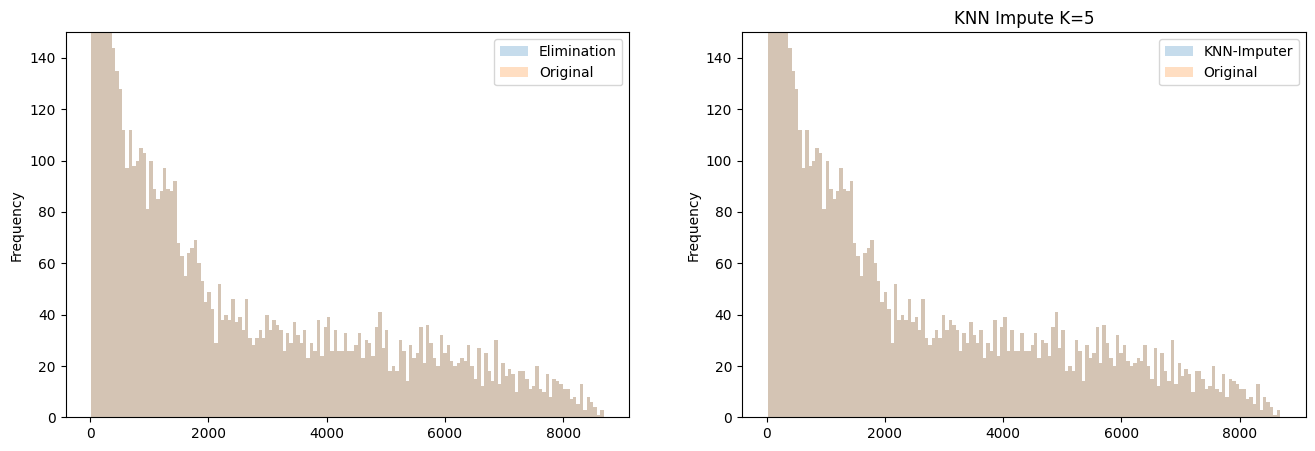

In [415]:
f = plt.figure(figsize=(16,5))

bin_num = 150
plt.subplot(1,2,1)
df_eliminated.TotalCharges.plot(kind='hist', alpha=0.25,
                        label="Elimination",
                        bins=bin_num)

df.TotalCharges.plot(kind='hist', alpha=0.25,
                        label="Original",
                        bins=bin_num)
plt.legend()
plt.ylim([0, 150])

plt.subplot(1,2,2)
df_imputed.TotalCharges.plot(kind='hist', alpha=0.25,
                        label="KNN-Imputer",
                        bins=bin_num)

df.TotalCharges.plot(kind='hist', alpha=0.25,
                        label="Original",
                        bins=bin_num)
plt.legend()
plt.ylim([0, 150])
plt.title(f'KNN Impute K={num_neighbors}')

plt.show()

These plots show that Total Charges exhibits strong positive skewness, reflecting the presence of many customers with relatively low Total charges and fewer customers with high accumulated charges or Total charges. Furthermore, both the Elimination and KNN imputation techniques preserve the original distributional characteristics, such as skewness and tail behavior. Neither method introduces substantial distortion, suggesting that the imputation procedures maintain the structure of the data. We believe this is as a result of the insignificant number of missing values

## DATA VISUALIZATION

# (1) Churn Distribution


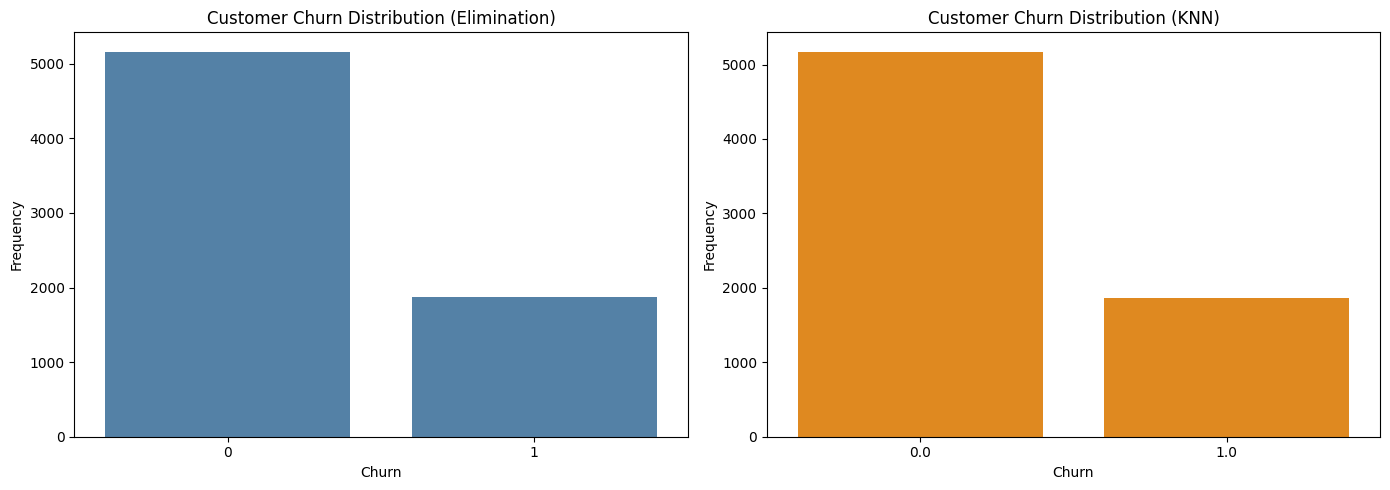

In [416]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


# 🔹 Elimination
sns.countplot(
    x='Churn',
    data=df_eliminated,
    color='steelblue',
    ax=axes[0]
)
axes[0].set_title("Customer Churn Distribution (Elimination)")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Frequency")

# 🔹 KNN Imputation

sns.countplot(
    x='Churn',
    data=df_imputed,
    color='darkorange',
    ax=axes[1]
)
axes[1].set_title("Customer Churn Distribution (KNN)")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



 We observe from the visualization that both the Eliminated dataset and the KNN imputed dataset show almost identical churn distributions. In both plots, the number of customers who did not churn is significantly higher than those who churned. This indicates that the dataset is imbalanced, with about 73% non-churners.

Also, the bar heights for churn and non-churn categories are nearly the same, suggesting that neither elimination nor KNN imputation meaningfully altered the overall churn proportions. This is an important observation because it shows that handling the missing values did not distort the target variable distribution. Again, we claim it is as a result of the insignificant number of missing data.


## (2) Tenure Distribution

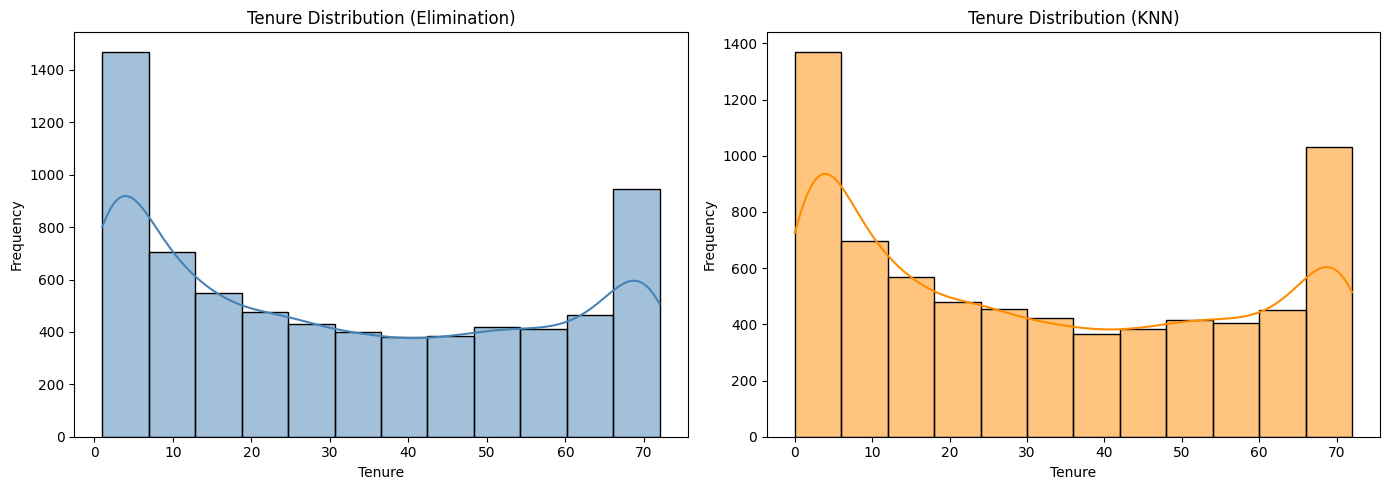

In [417]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 🔹 Elimination
sns.histplot(
    df_eliminated['tenure'],
    bins=12,
    kde=True,
    color='steelblue',
    ax=axes[0]
)
axes[0].set_title("Tenure Distribution (Elimination)")
axes[0].set_xlabel("Tenure")
axes[0].set_ylabel("Frequency")

# 🔹  KNN Imputation
sns.histplot(
    df_imputed['tenure'],
    bins=12,
    kde=True,
    color='darkorange',
    ax=axes[1]
)
axes[1].set_title("Tenure Distribution (KNN)")
axes[1].set_xlabel("Tenure")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


We observe that the tenure distribution for both the Elimination dataset and the KNN dataset is almost identical in shape and range, spanning roughly 0 to 72 months. In both cases, there is a strong concentration of customers with very low tenure around th first 5 months, followed by a gradual decline across the mid tenure values, and then a noticeable rise again near the highest tenure levels, suggesting the presence of both new customers and long-term loyal customers. The similarity in the histogram bars and density curves indicates that KNN imputation did not meaningfully alter the overall tenure structure.

Since we have seen from the previous two visualizations that there is no remarkable difference between the data with the eliminated values and the KNN imputed data, we shall proceed to just visualize the data with the eliminated values.

## (3) Monthly Charges by Churn


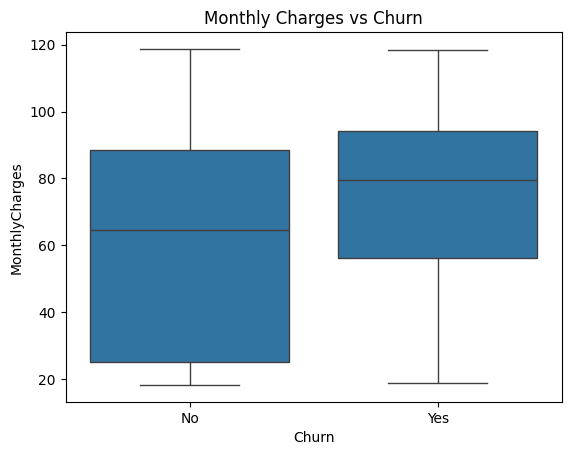

In [418]:

sns.boxplot(
    x=df_eliminated["Churn"].map({0: "No", 1: "Yes"}),
    y="MonthlyCharges",
    data=df_eliminated
)

plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.show()

This boxplot shows that customers who churned  tend to have higher monthly charges than customers who did not churn as seen by the higher median line in the churned group. We also observed that the charges for the customers that churned are more concentrated around 55-95 while non-churners include a much wider spread with many customers paying very low monthly charges.
So, this plot suggest that high monthly charges could be a reason why a customer churn.

## (4) Contract Type Distribution


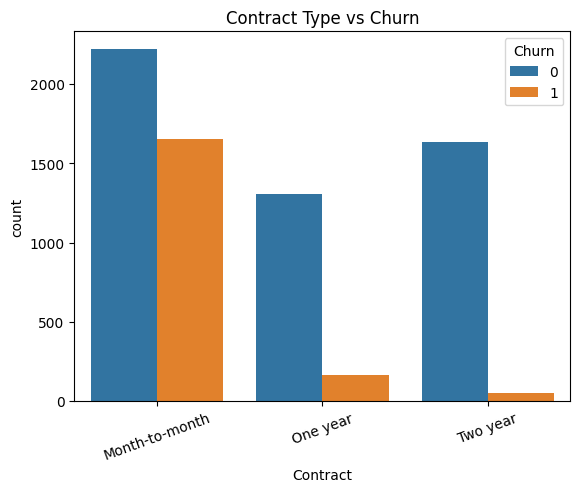

In [419]:
sns.countplot(x='Contract', hue='Churn', data=df_eliminated)
plt.xticks(rotation=20)
plt.title("Contract Type vs Churn")
plt.show()


We observed that customers on month-to-month contracts have the highest churn count by far, meaning they are much more likely to churn compared to customers on longer contracts. On the otherhand, customers on 1 year and 2 year contracts have very low churn counts. We can even see that customers with 2 years contarct almost do not churn at all. This suggests that longer term contracts greatly increase customer retention.

## (5) Total Charges Density

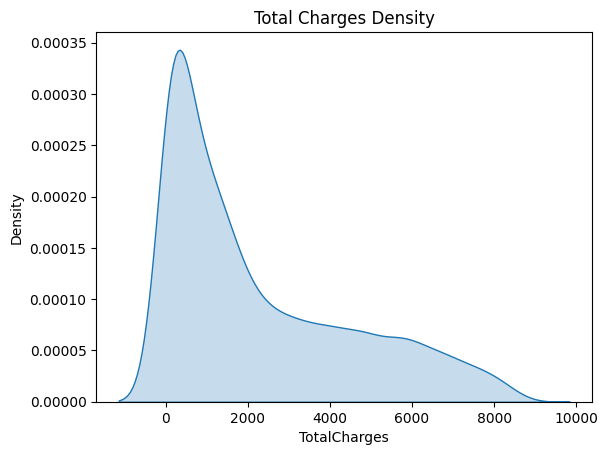

In [420]:
sns.kdeplot(df_eliminated['TotalCharges'], fill=True)
plt.title("Total Charges Density")
plt.show()

This density plot shows that Total Charges is heavily skewed to the right, indicating that most customers have relatively low total charges, while a smaller group has very high total charges. This would suggest that many customers either have short tenure, lower monthly bills. Also, as Total Charges increases, the density declines indicating fewer long term customers who have accumulated large total payments over time. So, we can infer from this distribution that Total Charges is strongly influenced by customer longevity and billing level.

## (6) Spearman Correlation Heatmap

In [ ]:
from sklearn.preprocessing import LabelEncoder
corr_df = df_eliminated.copy()
for col in corr_df.select_dtypes(include='object').columns:
    corr_df[col] = LabelEncoder().fit_transform(corr_df[col])


# Compute Spearman correlation
spearman_corr = corr_df.corr(method='spearman')

plt.figure(figsize=(14,10))
sns.heatmap(spearman_corr, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Heatmap")
plt.show()

Summary of our heat map

In [ ]:
# Here we use Chatgpt to help summarise the heatmap in tabular form
data = {
    'Feature': [
        'tenure',
        'Contract',
        'MonthlyCharges',
        'TotalCharges',
        'TechSupport',
        'StreamingServices',
        'SeniorCitizen',
        'Service Bundles (DeviceProtection, OnlineSecurity)'
    ],
    'Correlation with Churn': [
        ' -0.35',
        ' -0.35',
        ' +0.19',
        ' -0.20 (after controlling for tenure)',
        ' -0.12',
        '+0.1 to +0.15',
        ' +0.15',
        '-0.1 to -0.15'
    ],
    'Interpretation': [
        'Longer tenure → less likely to churn',
        'Long-term contracts reduce churn',
        'Higher bills → higher churn risk',
        'Low total charges often correspond to short-term churners',
        'Access to tech support reduces churn slightly',
        'Mixed effect; bundle may attract or retain depending on usage',
        'Slightly higher churn in older customers',
        'Protective services slightly reduce churn'
    ]
}

df2 = pd.DataFrame(data)

# Custom formatted table with borders
col_widths = [45, 35, 55]  # Adjust widths as needed
headers = ['Feature', 'Correlation with Churn', 'Interpretation']

# Top border
border = "+" + "+".join(["-" * (width + 2) for width in col_widths]) + "+"
print(border)

# Header row
header_row = "|"
for i, header in enumerate(headers):
    header_row += f" {header:<{col_widths[i]}} |"
print(header_row)

# Header bottom border
print(border)

# Data rows with spacing
for idx, row in df2.iterrows():
    data_row = "|"
    for i, header in enumerate(headers):
        data_row += f" {str(row[header]):<{col_widths[i]}} |"
    print(data_row)
    print(border)  # Border after each row for spacing

We observe from the heatmap that the strongest positive correlation in the plot is between tenure and Total Charges, which makes sense because customers who stay longer accumulate higher total payments. Monthly Charges also have a noticeable positive relationship with Total charges, since higher monthly charges increase the total over time. We  also observe that churn is negatively correlated with tenure and contract, meaning customers with longer tenure and longer contracts are much less likely to churn. Churn also shows negative correlations with TechSupport, OnlineSecurity, and DeviceProtection, suggesting that customers who subscribe to these tend to stay longer, while customers without them are more likely to leave. Furthermore, gender is less significant in determining if someone will churn or not.

##  Questions of Interest

 Q1: Does monthly charges affect Churn?

In [ ]:
df_eliminated.columns = df_eliminated.columns.str.strip()

# Ensure Churn is categorical
df_eliminated['Churn'] = df_eliminated['Churn'].map({0: 'No', 1: 'Yes'}) if df_eliminated['Churn'].dtype != 'object' else df_eliminated['Churn']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Violin Plot
sns.violinplot(
    x='Churn',
    y='MonthlyCharges',
    hue='Churn',
    data=df_eliminated,
    palette='coolwarm',
    legend=False,
    ax=axes[0]
)
axes[0].set_title("Distribution of Monthly Charges by Churn")

# Boxplot
sns.boxplot(
    x='Churn',
    y='MonthlyCharges',
    hue='Churn',
    data=df_eliminated,
    palette='Set2',
    legend=False,
    ax=axes[1]
)
axes[1].set_title("Boxplot of Monthly Charges by Churn")

# Bar Plot (Mean Comparison)
mean_charges = df_eliminated.groupby('Churn')['MonthlyCharges'].mean().reset_index()

sns.barplot(
    x='Churn',
    y='MonthlyCharges',
    hue='Churn',
    data=mean_charges,
    palette='pastel',
    legend=False,
    ax=axes[2]
)
axes[2].set_title("Average Monthly Charges by Churn")

plt.tight_layout()
plt.show()


These three plots consistently show that customers who churn (“Yes”) tend to have higher monthly charges than customers who do not churn (“No”). The violin plot and boxplot both indicate that the churn group is concentrated more in the mid-to-high monthly charge range, with a higher median compared to non-churners, while the non-churn group includes many customers paying very low monthly charges. This pattern is confirmed by the bar chart, where the average MonthlyCharges for churned customers is clearly higher than those for non-churned customers, suggesting that higher monthly billing is strongly associated with an increased likelihood of churn.

## Q2 What percentage of Senior Citizen churned?

In [ ]:

senior_count = df_eliminated['SeniorCitizen'].sum()
total_customers = len(df_eliminated)
senior_percentage = (senior_count / total_customers) * 100

print(f"Senior Citizens: {senior_count}")
print(f"Total Customers: {total_customers}")
print(f"Percentage: {senior_percentage:.2f}%")


The percenctage of senior citizens that churn are relatively small compared to those that do not. This indicate that they did not churn much among the senior citizens.

In [ ]:
# Ensure Churn is numeric
df_eliminated['Churn'] = df_eliminated['Churn'].map({'No': 0, 'Yes': 1}) if df_eliminated['Churn'].dtype == 'object' else df['Churn']

# Overall churn rate
overall_churn_rate = df_eliminated['Churn'].mean() * 100

# Filter Senior Citizens
senior_df = df_eliminated[df_eliminated['SeniorCitizen'] == 1]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ---- Plot 1: Overall Churn Rate ----
sns.barplot(
    x=['Overall'],
    y=[overall_churn_rate],
    ax=axes[0]
)
axes[0].set_ylabel("Churn Rate (%)")
axes[0].set_title("Overall Customer Churn Rate")
axes[0].set_ylim(0, 100)

# ---- Plot 2: Senior Citizen Churn vs No Churn by Contract ----
sns.countplot(
    x='Contract',
    hue='Churn',
    data=senior_df,
    ax=axes[1]
)

axes[1].set_title("Senior Citizens: Churn vs No Churn by Contract")
axes[1].legend(title="Churn", labels=["No", "Yes"])

plt.tight_layout()
plt.show()

This figure shows that the overall customer churn rate is roughly around one-quarter of the dataset, indicating a moderate churn problem. The second plot focuses on senior citizens and reveals that churn is strongly concentrated among seniors on month-to-month contracts, where the number of churners is even higher than non-churners. In contrast, senior citizens on one-year and two-year contracts show much lower churn counts, suggesting that longer contracts significantly reduce churn even within this group.

In [ ]:
# Group by Contract type
df_grouped = df_eliminated.groupby(by='Contract')

for val, grp in df_grouped:
    total_customers = len(grp)
    churned = grp['Churn'].sum()
    churn_rate = grp['Churn'].mean() * 100

    print(f"There were {total_customers} customers on {val} contracts.")
    print(f"{churned} customers churned.")
    print(f"Churn rate: {churn_rate:.2f}%\n")


In [ ]:
# Ensure Churn is numeric
df_eliminated['Churn'] = df_eliminated['Churn'].map({'No': 0, 'Yes': 1}) if df_eliminated['Churn'].dtype == 'object' else df['Churn']

# Compute churn rate by contract
contract_summary = df.groupby('Contract')['Churn'].agg(['count', 'sum', 'mean'])
contract_summary['churn_rate'] = contract_summary['mean'] * 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Churn Rate by Contract
sns.barplot(
    x=contract_summary.index,
    y=contract_summary['churn_rate'],
    ax=axes[0]
)
axes[0].set_ylabel("Churn Rate (%)")
axes[0].set_title("Churn Rate by Contract")
axes[0].set_ylim(0, 100)

# Count Plot (Raw churn distribution)
sns.countplot(
    x='Contract',
    hue='Churn',
    data=df_eliminated,
    ax=axes[1]
)
axes[1].set_title("Churn Distribution by Contract")

# Stacked Percentage Plot
churn_prop = pd.crosstab(df_eliminated['Contract'], df_eliminated['Churn'], normalize='index') * 100
churn_prop.plot(
    kind='bar',
    stacked=True,
    ax=axes[2]
)
axes[2].set_ylabel("Percentage (%)")
axes[2].set_title("Percentage Distribution of Churn")
axes[2].legend(title="Churn", labels=["No", "Yes"])

plt.tight_layout()
plt.show()


These three plots show that contract type is one of the strongest drivers of churn in the dataset. Customers on month-to-month contracts have by far the highest churn rate, around the 40% range, while churn drops sharply for customers on one-year contract, roughly near 10%, and it becomes extremely low for two-year contracts, less than 4%. The count and percentage plots confirm the same pattern: most churn cases come from the month-to-month group, whereas one-year and especially two-year customers are overwhelmingly non-churners. Overall, longer contracts are strongly associated with customer retention and significantly reduce churn risk.

## Q3 Does Gender influence churners?

In [ ]:
df_grouped = df_eliminated.groupby(by='gender')

for val, grp in df_grouped:
    total_customers = len(grp)
    churned = grp['Churn'].sum()
    churn_rate = grp['Churn'].mean() * 100

    print(f"There were {total_customers} {val} customers.")
    print(f"{churned} customers churned.")
    print(f"Churn rate: {churn_rate:.2f}%\n")


In [ ]:
# Ensure Churn is numeric (0/1)
df_eliminated['Churn'] = df_eliminated['Churn'].map({'No': 0, 'Yes': 1}) if df_eliminated['Churn'].dtype == 'object' else df['Churn']

# Prepare calculations
churn_by_gender = df_eliminated.groupby('gender')['Churn'].mean() * 100
churn_prop = pd.crosstab(df_eliminated['gender'], df_eliminated['Churn'], normalize='index') * 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar plot – Churn Rate
sns.barplot(
    x=churn_by_gender.index,
    y=churn_by_gender.values,
    ax=axes[0]
)
axes[0].set_ylabel("Churn Rate (%)")
axes[0].set_title("Churn Rate by Gender")

# Count plot – Distribution
sns.countplot(
    x='gender',
    hue='Churn',
    data=df_eliminated,
    ax=axes[1]
)
axes[1].set_title("Churn Distribution by Gender")

# Stacked percentage bar plot
churn_prop.plot(
    kind='bar',
    stacked=True,
    ax=axes[2]
)
axes[2].set_ylabel("Percentage (%)")
axes[2].set_title("Percentage Distribution of Churn")
axes[2].legend(title="Churn", labels=["No", "Yes"])

plt.tight_layout()
plt.show()


These plots show that gender has little to no effect on churn in this dataset. The churn rates for female and male customers are nearly identical, both sitting around the mid 20% range, and the churn counts and percentage distributions confirm that the proportion of churners versus non-churners is almost the same for both groups. Overall, this suggests that gender is not a strong predictor of churn compared to more influential variables like contract type, tenure, or monthly charges.

## Q4 What is the absolute average difference (AAD) of those who churn in different contract

In [ ]:
# Create code for calculating the absolute average difference
#   for survival in each group, df_grouped.Survived

df_grouped = df_eliminated.groupby(by='Contract')

for val, grp in df_grouped:
    aad = np.mean(np.abs(grp['Churn'] - grp['Churn'].mean()))
    print(f"The AAD of churn for {val} contracts is {aad:.4f}.")


This shows that churn is highest and most unstable among month-to-month customers, where many customers leave and the churn rate is close to 50%, making this group the most at risk. Customers on one-year contracts experience much lower churn, with only moderate variation, meaning fewer customers leave compared to month-to-month plans. In contrast, customers on two-year contracts show very low churn and minimal variation, indicating that long-term contracts strongly improve retention and significantly reduce churn risk.

## Q5 How does having other side services influence churn

In [ ]:

# Ensure Churn is numeric
df_eliminated['Churn'] = df_eliminated['Churn'].map({'No': 0, 'Yes': 1}) if df_eliminated['Churn'].dtype == 'object' else df['Churn']

services = [
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, service in enumerate(services):

    churn_rate = df.groupby(service)['Churn'].mean() * 100
    churn_rate = churn_rate.reset_index()

    sns.barplot(
        x=service,
        y='Churn',
        hue=service,
        data=churn_rate,
        palette='Set2',
        legend=False,
        ax=axes[i]
    )

    axes[i].set_ylabel("Churn Rate (%)")
    axes[i].set_title(f"Churn Rate by {service}")
    axes[i].set_ylim(0, 100)

# Remove empty subplot if any
for j in range(len(services), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


These plots show that churn is strongly influenced by internet related services while features like MultipleLines have only a small effect. Customers with fiber optic internet have the highest churn rate, around the 40% range, much higher than DSL and customers with no internet service, suggesting fiber users are a high risk group. The strongest retention signals come from services such as OnlineSecurity, TechSupport, and DeviceProtection, where customers who do not have these services show much higher churn, while customers who do have them churn far less. In contrast, StreamingTV and StreamingMovies show weaker effects, with churn rates being somewhat similar whether customers have them or not, meaning these entertainment services are not as predictive of churn as security and support features.

In [ ]:
from umap import UMAP
from sklearn.preprocessing import StandardScaler


X = df_eliminated.drop(columns=['Churn'])
X_encoded = pd.get_dummies(X, drop_first=True)
X_scaled = StandardScaler().fit_transform(X_encoded)


umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

plt.scatter(X_umap[:,0], X_umap[:,1], c=(df_eliminated['Churn']=='Yes'))
plt.title("UMAP Projection of Telco Customers")

This UMAP projection shows that the Telco customers are not distributed uniformly, but instead form several dense clusters, meaning there are distinct groups of customers with similar feature patterns like similar contract types, tenure ranges, service subscriptions, and billing behavior. We can infer that  the smaller clusters scattered around the edges likely represent new customers, high charge customers, or customers with specific service bundles.